In [1]:
function create_matrix(m)
    B = [ i == j        ?  4. :
          abs(i-j) == 1 ? -1. : 0.
              for i in 1:m, j in 1:m ]
    A = zeros(m * m, m * m)

    for i = 1:m
        for j = 1:m
            if i == j
                A[m*(i - 1) + 1 : m*i, m*(j - 1) + 1: m*j] = B
            elseif abs(i - j) == 1
                A[m*(i - 1) + 1 : m*i, m*(j - 1) + 1: m*j] = -eye(m)            
            end
        end
    end
    
    return A
end

create_matrix (generic function with 1 method)

In [2]:
function create_rhs(m)
    return ones(m * m)
end

create_rhs (generic function with 1 method)

In [3]:
function forward_substitution(L, b)
    m, n = size(L)
    if m != n
        error("argument must be a square matrix")
    end
    
    x = zeros(n)
    for i = 1:n
        sum = b[i]
        for j = 1:i-1
            sum -= L[i,j] * x[j]
        end
        x[i] = sum / L[i,i]
    end 
    return x
end

forward_substitution (generic function with 1 method)

In [4]:
function diagonal_solve(d, b)
    n = length(d)
    
    x = zeros(n)
    for i = 1:n
        x[i] = b[i] / d[i]
    end 
    return x
end

diagonal_solve (generic function with 1 method)

In [5]:
function iterative_solve(A, b, ω=1, iteration_step, tol=1e-8, max_iter=20000)
    m, n = size(A)
    if m != n
        error("Matrix not symmetric.")
    end
    if n != length(b)
        error("Right-hand side has incorrect size")
    end
    
    x = zeros(n)
    r = b - A * x
    for k = 1:max_iter
        # Update step:
        δx = iteration_step(r)
        x += δx
        
        # Convergence check:
        r = b - A * x
        if (norm(r) / norm(x) <= tol)
            return x, k
        end
    end
    return x,k
    
    error("Iterative scheme diverged.")
end

iterative_solve (generic function with 3 methods)

In [6]:
direct_solve(A) = r -> A\r

direct_solve (generic function with 1 method)

In [7]:
jacobi_step(A) = r -> diagonal_solve(diag(A), r)

jacobi_step (generic function with 1 method)

In [8]:
gauss_seidel_step(A) = r -> forward_substitution(tril(A), r)

gauss_seidel_step (generic function with 1 method)

In [9]:
function sor_matrix(A, ω)
    D = diagm(diag(A))
    L = tril(A,-1)
    return 1/ω*D + L
end

sor_matrix (generic function with 1 method)

In [10]:
sor_step(A, ω=1.6) = r -> forward_substitution(sor_matrix(A, ω), r)

sor_step (generic function with 2 methods)

In [11]:
function spr(A)
    return maximum([ abs(λ) for λ in eigvals(A)])
end

spr (generic function with 1 method)

In [22]:
last = 6
m = [2^k for k = 1:last]
k = zeros(last)
jacobi_iterations = zeros(last)
gauss_seidel_iterations = zeros(last)
ω_opt = zeros(last)
SOR_iterations = zeros(last)

for i in 1:last
    A = create_matrix(m[i])
    b = create_rhs(m[i])
    jacobi_iterations[i] = iterative_solve(A, b, jacobi_step(A))[2];
    gauss_seidel_iterations[i] = iterative_solve(A, b, gauss_seidel_step(A))[2];
    ω_opt[i] = 2./(1 + sqrt(1 - cos(pi/(m[i] + 1))^2))
    SOR_iterations[i] = iterative_solve(A, b, sor_step(A, ω_opt[i]))[2];
end

In [13]:
#using PyPlot
#ωs = collect(1.02:0.02:1.98)
#ns = [iterative_solve(A, b, sor_step(A, ω))[2] for ω = ωs];
#plot(ωs, ns);

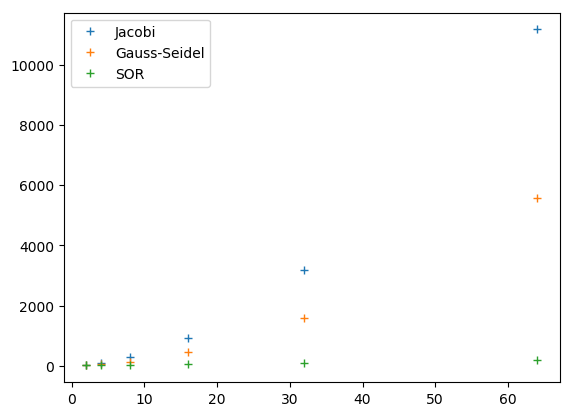

In [29]:
using PyPlot
    plot(m, jacobi_iterations, label = "Jacobi", linestyle = "", "+")
    plot(m, gauss_seidel_iterations, label = "Gauss-Seidel", linestyle = "", "+")
    plot(m, SOR_iterations, label = "SOR", linestyle = "", "+")
legend();